<a href="https://colab.research.google.com/github/shahmonil/Investigating-TMDB/blob/master/Investigating_TMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataset  =pd.read_csv('data.csv')
dataset.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [ ]:
dataset.shape

(10866, 21)

In [ ]:
dataset.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

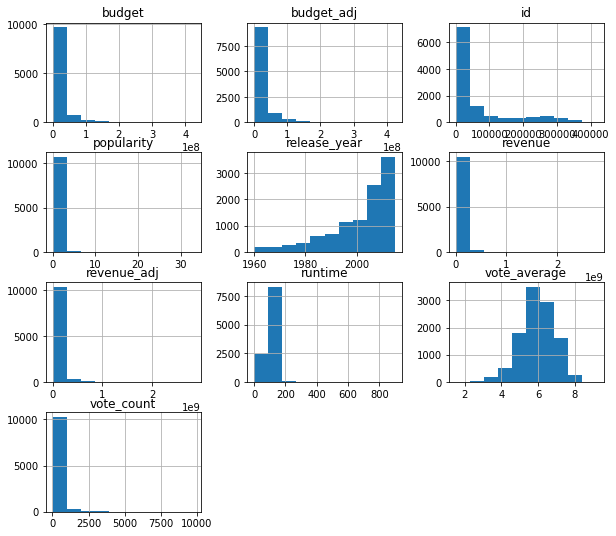

In [ ]:
dataset.hist(figsize=(10,9))
plt.show()

In [ ]:
#We see that budget, revenue have 0 in their values --> they rows need to be deleted

In [ ]:
#Let's delete the columns that we don't need
column_no = [ 'id', 'imdb_id',  'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies',
              'vote_count', 'vote_average']
dataset.drop(columns=column_no, inplace=True)

In [ ]:
#We don't need vote count as acc to histogram,the vote counts is different for every movie which leads an voe_avg that cannot be compared

In [ ]:
dataset.isnull().sum()

popularity           0
budget               0
revenue              0
original_title       0
cast                76
director            44
tagline           2824
runtime              0
genres              23
release_date         0
release_year         0
dtype: int64

In [ ]:
dataset[dataset.duplicated() == True].shape

(1, 11)

In [ ]:
dataset.drop_duplicates(keep='first',inplace=True)

In [ ]:
dataset.shape

(10865, 11)

In [ ]:
dataset[dataset.budget == 0].shape

(5696, 11)

In [ ]:
dataset[dataset.revenue == 0].shape

(6016, 11)

In [ ]:
dataset.budget.replace(0,np.nan, inplace=True)
dataset.revenue.replace(0,np.nan, inplace = True)

In [ ]:
dataset.dropna(subset=['budget','revenue'], inplace=True)

In [ ]:
dataset.nsmallest(10,columns='runtime')

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
5162,0.208637,10.0,5.0,Kid's Story,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,Shinichiro Watanabe,NaN,15,Science Fiction|Animation,6/2/2003,2003
8005,0.592219,3000000.0,21000000.0,Mickey's Christmas Carol,Alan Young|Wayne Allwine|Clarence Nash|Hal Smi...,Burny Mattinson,He's back! Mickey Mouse - in his first new mot...,26,Family|Animation,10/19/1983,1983
3239,0.352054,200000.0,3.0,Dr. Horrible's Sing-Along Blog,Neil Patrick Harris|Nathan Fillion|Felicia Day...,Joss Whedon,He has a Ph.D. in horribleness!,42,Adventure|Action|Comedy|Science Fiction|Music,7/15/2008,2008
3818,0.331313,250000.0,1000000.0,Louis C.K.: Live at the Beacon Theater,Louis C.K.,Louis C.K.,Buy The Thing,62,Comedy,12/10/2011,2011
3424,1.425344,30000000.0,14460000.0,Winnie the Pooh,Jim Cummings|Travis Oates|Jim Cummings|Bud Luc...,Stephen Anderson|Don Hall,Oh Pooh.,63,Animation|Family,4/13/2011,2011
7020,1.117300,1000000.0,332323.0,9 Songs,Kieran O'Brien|Margo Stilley|The Dandy Warhols...,Michael Winterbottom,"2 lovers, one summer, and the 9 songs that def...",66,Drama|Music|Romance,7/16/2004,2004
9462,1.101103,12300000.0,84460846.0,The Land Before Time,Gabriel Damon|Candace Hutson|Judith Barsi|Will...,Don Bluth,A new adventure is born.,69,Animation|Adventure|Family,11/18/1988,1988
10093,0.142836,500000.0,3779620.0,Paris is Burning,Dorian Corey|Pepper LaBeija|Willi Ninja|Octavi...,Jennie Livingston,Having A Ball...Wish You Were Here.,71,Documentary,3/13/1990,1990
4000,0.678896,20000000.0,109862682.0,Return to Never Land,Harriet Owen|Blayne Weaver|Jeff Bennett|Kath S...,Robin Budd|Donovan Cook,The Classic Continues,72,Adventure|Fantasy|Animation|Family,2/14/2002,2002
4966,1.781615,20000000.0,135680000.0,The Jungle Book 2,John Goodman|Haley Joel Osment|Mae Whitman|Phi...,Steve Trenbirth,Feel the jungle beat,72,Family|Animation|Adventure,2/7/2003,2003


In [ ]:
dataset[dataset.runtime == 0].shape   #conformation

(0, 11)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      3854 non-null   float64
 1   budget          3854 non-null   float64
 2   revenue         3854 non-null   float64
 3   original_title  3854 non-null   object 
 4   cast            3850 non-null   object 
 5   director        3853 non-null   object 
 6   tagline         3574 non-null   object 
 7   runtime         3854 non-null   int64  
 8   genres          3854 non-null   object 
 9   release_date    3854 non-null   object 
 10  release_year    3854 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 361.3+ KB


In [ ]:
dataset['release_date'] = pd.to_datetime(dataset.release_date)

In [ ]:
dataset.budget = dataset.budget.astype(int)
dataset.revenue = dataset.revenue.astype(int)

In [ ]:
#Inserting a profit column
dataset['Profit'] = dataset.revenue - dataset.budget

1. Movie with highest and lowest profit

In [ ]:
dataset.nlargest(1,'Profit')

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,Profit
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,2009,2544505847


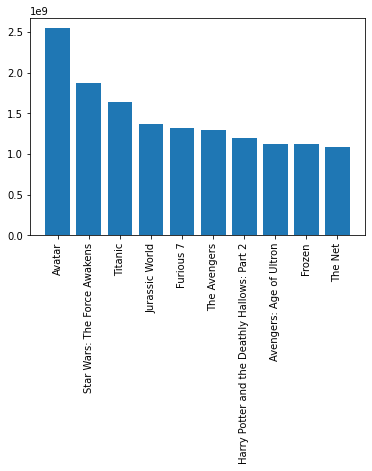

In [ ]:
sort_profit = dataset.Profit.sort_values(ascending  = False).head(10)
title =[]
profit =[]
for i in sort_profit.index:
  title.append(dataset.loc[i,'original_title'])
  profit.append(dataset.loc[i,'Profit'])

plt.bar(title,profit)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
dataset.nsmallest(1,'Profit')

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,Profit
2244,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,Assassin. Hero. Legend.,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,2010,-413912431


2. Movie with highest and lowest runtime

In [ ]:
dataset.nlargest(1,'runtime')

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,Profit
2107,0.534192,18000000,871279,Carlos,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Olivier Assayas,The man who hijacked the world,338,Crime|Drama|Thriller|History,2010-05-19,2010,-17128721


In [ ]:
dataset.nsmallest(1,'runtime')

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,Profit
5162,0.208637,10,5,Kid's Story,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,Shinichiro Watanabe,NaN,15,Science Fiction|Animation,2003-06-02,2003,-5


3. Highest and lowest Budget

In [ ]:
print('Highest Budget')
dataset.nlargest(1,'budget')

Highest Budget


,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,Profit
2244,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,Assassin. Hero. Legend.,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,2010,-413912431


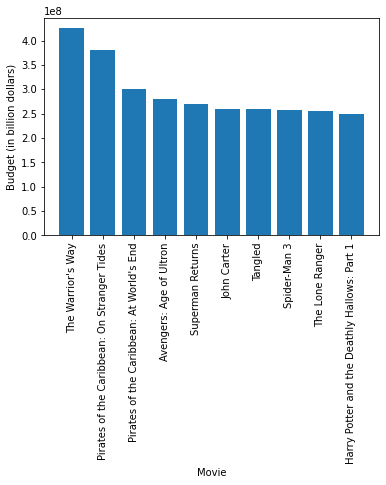

In [ ]:
sort_budget = dataset.budget.sort_values(ascending  = False).head(10)
title =[]
budget =[]
for i in sort_budget.index:
  title.append(dataset.loc[i,'original_title'])
  budget.append(dataset.loc[i,'budget'])

plt.bar(title,budget)
plt.xlabel('Movie')
plt.ylabel('Budget (in billion dollars)')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
print('Lowest Budget')
dataset.nsmallest(1,'budget')

Lowest Budget


,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,Profit
2618,0.090186,1,100,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,A comedy about a guy who would do anything to ...,95,Comedy|Romance,1999-04-23,1999,99


4. Effect of popularity

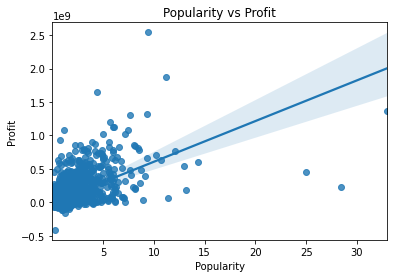

In [ ]:
sns.regplot(x = dataset.popularity, y = dataset.Profit, data = dataset)
plt.title('Popularity vs Profit')
plt.xlabel('Popularity')
plt.ylabel('Profit')
plt.show()

 5. Avg runtime of all movie

In [ ]:
print('Average runtime of all movies is',dataset.runtime.mean())

Average runtime of all movies is 109.22029060716139


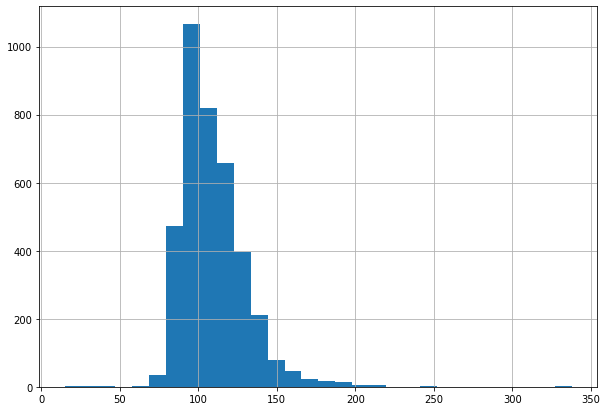

In [ ]:
#But it contains outliers, therefore we should figure that out
plt.figure(figsize=(10,7))
plt.grid()
plt.hist(dataset.runtime, rwidth=1, bins = 30)
plt.show()

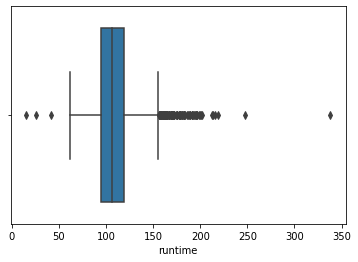

In [ ]:
sns.boxplot(dataset.runtime)

In [ ]:
dataset.runtime.describe()  #This the avg duration of tbe movie, depending on the percentile

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

In [ ]:
#Therefore 50% of the movies have runtime between 95 and 119 minutes

6 In which year we had the most movies making profits?

In [ ]:
d1 = dataset.groupby('release_year')['Profit'].sum().sort_index()

In [ ]:
#Let us use plotly for this
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [ ]:
data = [go.Scatter(x = d1.index,y = d1.values, name='So')]

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(
    data=data,
   layout = go.Layout(dict(title = 'Profit by year'),xaxis=dict(title = 'Year'), yaxis=dict(title = 'Profit in Billion $'), legend=dict(orientation='v'))
)
fig.show(renderer="colab")

In [ ]:
#Let us now consider the number of movies per year and comapre with the profit
d1 = dataset.release_year.value_counts().sort_index()
d2 = dataset.groupby('release_year')['Profit'].sum().sort_index()

data= [go.Scatter(x = d1.index,y=d1.values,name='Number of films'),
go.Scatter(x = d2.index, y = d2.values, name = 'Profit',yaxis='y2')]

layout=go.Layout(dict(title = 'Number of films and total Profit per year'),xaxis=dict(title='Year'), yaxis=dict(title = 'Number of films'),
                 yaxis2=dict(title = 'Profit', overlaying = 'y', side = 'right'))


fig = go.Figure(
    data=data,
   layout = layout)
fig.show(renderer = 'colab')


What are the top casts, directors and genres?

In [ ]:
#First we need to take out the most profitable movies and the compare almongst themselves

In [ ]:
dataset.Profit.describe()

count    3.854000e+03
mean     7.048292e+07
std      1.506195e+08
min     -4.139124e+08
25%     -1.321535e+06
50%      2.002019e+07
75%      8.170331e+07
max      2.544506e+09
Name: Profit, dtype: float64

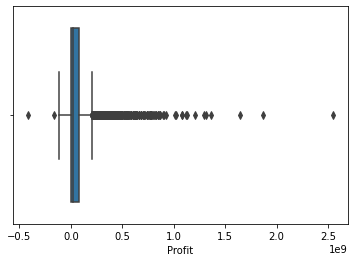

In [ ]:
sns.boxplot(x = 'Profit', data = dataset)

In [ ]:
#Taking the movies that made most profit, threshold is >= 50M$
most_profit_data = dataset[dataset.Profit >= 50000000]

In [ ]:
most_profit_data.shape

(1338, 12)

In [ ]:
most_profit_data.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,Profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,228436354
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015,1316249360


In [ ]:
print('The runtime for the profitable movie was', round(most_profit_data.runtime.mean(),2),'minutes')
print('The average budget of profitable movie was $',round(most_profit_data.budget.mean(),2))

The runtime for the profitable movie was 113.67 minutes
The average budget of profitable movie was $ 60444957.76


8 Finding the most famous director and genre from the profitable movies

In [ ]:
most_profit_data.director.unique()[30:60]       #there are sep

array(['Rob Letterman', 'Peter Sohn', 'John Crowley', 'F. Gary Gray',
       'Breck Eisner', 'Tim Johnson', 'Jake Schreier', 'Nancy Meyers',
       'Baltasar KormÃ¡kur', 'Denis Villeneuve', 'Paul Feig',
       'Glenn Ficarra|John Requa', 'Ryan Coogler', 'Judd Apatow',
       'Steve Martino', 'Genndy Tartakovsky',
       'John Francis Daley|Jonathan M. Goldstein', 'Gil Kenan',
       'Joel Edgerton', 'Sean Anders', 'Andy Fickman', 'Jeremy Garelick',
       'M. Night Shyamalan', 'Simon Curtis', 'Jason Moore',
       'Gregory Jacobs', 'Gregory Plotkin', 'Paul Tibbitt',
       'Levan Gabriadze', 'Leigh Whannell'], dtype=object)

In [ ]:
#We need to extract values from the columns and also keep their counts
def extract_sep(column_name):
  all_data = most_profit_data[column_name].str.cat(sep = '|')  #concat with '|' and then splitting with '|' and mainting the count
  all_data = pd.Series(all_data.split('|'))
  count = all_data.value_counts().sort_values(ascending =False)
  return count

In [ ]:
#a = most_profit_data.director.str.cat(sep = '|')
#a = pd.Series(a.split('|'))
#a.value_counts().head()

In [ ]:
extract_sep('director').head()

Steven Spielberg    23
Robert Zemeckis     13
Clint Eastwood      12
Tim Burton          11
Tony Scott          10
dtype: int64

In [ ]:
#The director who directed most number of profitable movies was Steven Spielberg

In [ ]:
extract_sep('genres').head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

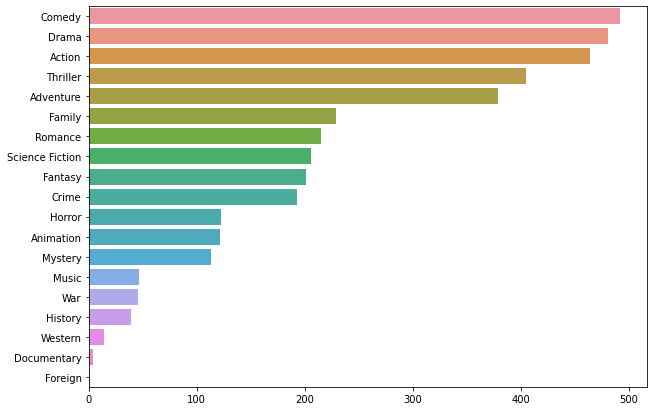

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x =extract_sep('genres').values, y=extract_sep('genres').index)
plt.show()

In [ ]:
#Therefore the most famous genres were Comedy, Drama and Action

In [ ]:
extract_sep('cast').head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

In [ ]:
#Months that released most number of movies (profitable)
most_profit_data['release_month'] = most_profit_data.release_date.dt.month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
most_profit_data.head(1)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year,Profit,release_month
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810,6


Which month had the most number of movie releases?

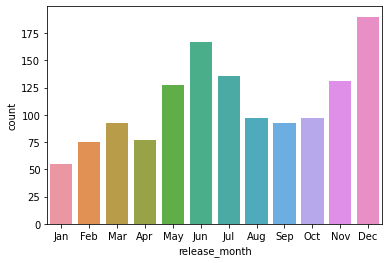

In [ ]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig, ax = plt.subplots()
sns.countplot(most_profit_data.release_month,ax =ax )
ax.set_xticklabels(months)
plt.show()


In [ ]:
#Most number of movies were released in December

Which month was the most profitable?

In [ ]:
d3 = most_profit_data.groupby('release_month')['Profit'].sum()
d3

release_month
1      6379416607
2      9739829445
3     17137507412
4     14955033394
5     33718411507
6     41646750096
7     28365057447
8     12534493365
9     13088138930
10    16120319912
11    29721298097
12    36851742856
Name: Profit, dtype: int64

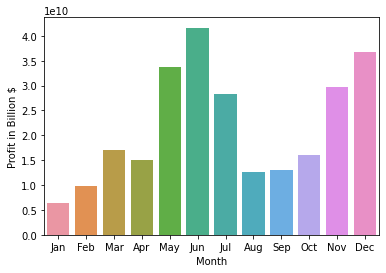

In [ ]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig, ax = plt.subplots()
sns.barplot(x = d3.index,y=d3.values, ax = ax)
ax.set_xticklabels(months)
plt.ylabel('Profit in Billion $')
plt.xlabel('Month')
plt.show()

In [ ]:
#Most number of profits were in June

**Conclusion**: To get a movie that could explode at the box office:

Choose any director from this - Steven Spielberg, Robert Zemeckis, Ron Howard, Tony Scott

Choose any cast from this - Actors - Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone, Denzel Washington.

Choose these genre - Action, Adventure, Thriller, Comedy, Drama.

Choose these release months - May, June, July, November, December.

The duration should be around 110 and 120 minutes 

(This is not 100% certain but the following insights can be used to improve the chances of a movie success.)